$f(A_n,B_n) = \frac{A_n - B_n}{2} + A_n$

For any point 1 dimensional point $A_n$ and $B_n$ placed in n dimensional space, where point A and B are 1D matrices with the length of the matrix being the number of dimensions of the space is placed in, the above equation calculates the midpoint exactly halfway between point A and B.

In [170]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

In [3]:
def deg2rad(deg):
    return deg *np.pi/180

In [171]:
initial_points = [[0,1],
                  [np.cos(deg2rad(30)),-np.sin(deg2rad(30))],
                  [-np.cos(deg2rad(30)),-np.sin(deg2rad(30))]]

Have to add derivation of midpoint function

In [240]:
@jit()
def get_midpoint(p1,p2,jump):
    x1 = (((p2[0]-p1[0])*jump)+p1[0])
    y1 = (((p2[1]-p1[1])*jump)+p1[1])
    return [x1,y1]

In [271]:
#@jit(nopython=True)
def run_test():
    data = []
    for i in range(1000000):
        data.append(get_midpoint((0,0),(1,1),0.5))

In [272]:
%%time
run_test()

Wall time: 1.55 s


In [ ]:
@jit(nopython=True)
def go_fast(a): # Function is compiled and runs in machine code
    trace = 0.0
    for i in range(a.shape[0]):
        trace += np.tanh(a[i, i])
    return a + trace

In [226]:
import numpy as np
import time

x = np.arange(100).reshape(10, 10)



# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE
start = time.time()
go_fast(x)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (with compilation) = 0.0
Elapsed (after compilation) = 0.0


In [169]:
def get_midpoint_old(p1,p2,jump):
    x1 = (p1[0] + p2[0])/(1/jump)
    y1 = (p1[1] + p2[1])/(1/jump)
    return [x1,y1]

In [164]:
p1 = (2,0)
p2 = (5,5)

In [165]:
used_func_x = []
old_func_x = []
used_func_y = []
old_func_y = []
x = np.linspace(0.1,1,10)

for i in x:
    x1,y1 = get_midpoint(p1,p2,i)
    used_func_x.append(x1)
    used_func_y.append(y1)
    
    x2,y2 = get_midpoint_old(p1,p2,i)
    old_func_x.append(x2)
    old_func_y.append(y2)

In [167]:
p1 = [2,0]
p2 = [5,5]

In [168]:
get_midpoint(p1,p2,0.5)

[3.5, 2.5]

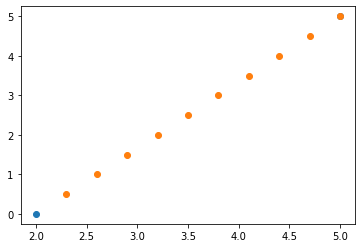

In [166]:
plt.scatter([p1[0],p2[0]],[p1[1],p2[1]])
plt.scatter(used_func_x,used_func_y)
#plt.scatter(old_func_x,old_func_y)

In [49]:

jump = 0.2
print(get_midpoint(p1,p2,jump))
print(get_midpoint_old(p1,p2,jump))

[1.0, 1.8]
[1.0, 1.2]


In [7]:
def get_midpoint(p1,p2,jump):
    x1 = (((p2-p1)*jump)+p1)
    return x1

In [12]:
def get_midpoint_old(p1,p2,jump):
    x1 = (p1 + p2)/(1/jump)
    return x1

In [13]:
get_midpoint(0,10,-0.5)

-5.0

In [17]:
get_midpoint_old(0,10,-0.5)

-5.0